In [1]:
# Simulate and forecast a random walk

In [2]:
# Import time module
from datetime import datetime as dt

# Record start time
start = dt.now()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Generate a random walk of 500 timesteps

np.random.seed(35)

steps = np.random.standard_normal(500)
steps[0] = 10

In [4]:
# Calculate the cumulative sum of errors for each timestep in the simulated process.

random_walk = np.cumsum(steps)

In [5]:
random_walk

array([ 1.00000000e+01,  9.58640782e+00,  8.82038181e+00,  7.89625514e+00,
        6.47465731e+00,  7.27991330e+00,  8.42877506e+00,  9.59820346e+00,
        8.79619417e+00,  9.51867181e+00,  9.57165885e+00,  8.39013869e+00,
        7.71398753e+00,  7.54776094e+00,  8.01519613e+00,  8.34891524e+00,
        7.49925742e+00,  7.56794017e+00,  7.58652215e+00,  8.90205523e+00,
        1.00668298e+01,  9.72650112e+00,  9.78273443e+00,  1.00086131e+01,
        9.63299267e+00,  1.01863060e+01,  8.81540194e+00,  9.79804528e+00,
        1.00867441e+01,  8.48943356e+00,  8.15238827e+00,  7.33559333e+00,
        8.41528577e+00,  8.84444748e+00,  7.59638427e+00,  6.91424869e+00,
        7.34916151e+00,  8.61572612e+00,  9.37365221e+00,  9.36250368e+00,
        1.06810321e+01,  1.18098151e+01,  1.10821702e+01,  1.07213891e+01,
        1.11742556e+01,  1.05869991e+01,  7.57035790e+00,  8.55266615e+00,
        7.43559385e+00,  7.24870771e+00,  6.06536067e+00,  6.93679822e+00,
        5.97424613e+00,  

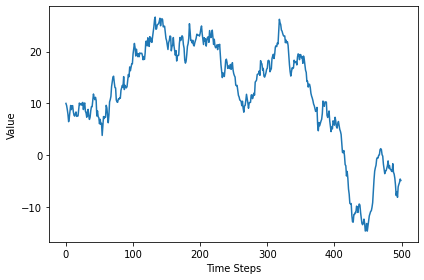

In [6]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel("Time Steps")
ax.set_ylabel("Value")

plt.tight_layout()

In [7]:
# Test for stationarity - use augmented Dickey-Fuller (ADF) test
# If the test returns a p-value less than a certain significance level, typically 0.05 or 0.01, the series is stationary.
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(random_walk)

print(f"ADF statistic: {adf_result[0]}")
print(f"ADF p-value: {adf_result[1]}")

ADF statistic: -0.6820966347667192
ADF p-value: 0.8513325732150709


In [8]:
# Apply a first-order difference.

diff_random_walk = np.diff(random_walk, 1)

In [9]:
# Test for stationarity - use augmented Dickey-Fuller (ADF) test
adf_diff_result = adfuller(diff_random_walk)

print(f"ADF Statistic: {adf_diff_result[0]}")
print(f"ADF p-value: {adf_diff_result[1]}")

ADF Statistic: -20.593569807461446
ADF p-value: 0.0


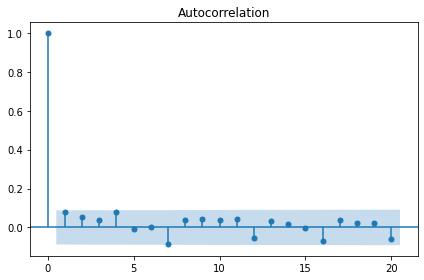

In [10]:
# Check for auto - correlation: measures the correlation between a variable and itself at a previous timestep (lag)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diff_random_walk, lags=20)

plt.tight_layout()

In [11]:
# Split your simulated random walk into a train set containing the first 400 timesteps.
# The remaining 100 timesteps will be your test set.

df = pd.DataFrame({'value': random_walk})

train = df[:400].copy()
test = df[400:].copy()

In [12]:
# Apply different naive forecasting methods and measure the MSE.
# 1. Forecasting the mean

mean = np.mean(train.value)

test.loc[:, 'pred_mean'] = mean
test.head()

,value,pred_mean
400,5.802229,15.953696
401,7.323946,15.953696
402,6.634222,15.953696
403,5.506857,15.953696
404,5.233202,15.953696


In [13]:
# 2. Forecasting the last value

last_value = train.iloc[-1].value

test.loc[:, 'pred_last'] = last_value
test.head()

,value,pred_mean,pred_last
400,5.802229,15.953696,6.361661
401,7.323946,15.953696,6.361661
402,6.634222,15.953696,6.361661
403,5.506857,15.953696,6.361661
404,5.233202,15.953696,6.361661


In [14]:
# 3. Drift method
# Slope of a straight line by dividing the change in the y-axis by the change in the x-axis

deltaX = 400 - 1
deltaY = last_value - 10

drift = deltaY / deltaX
#print(drift)
x_vals = np.arange(400, 500, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift
test.head()

,value,pred_mean,pred_last,pred_drift
400,5.802229,15.953696,6.361661,-3.647458
401,7.323946,15.953696,6.361661,-3.656577
402,6.634222,15.953696,6.361661,-3.665695
403,5.506857,15.953696,6.361661,-3.674814
404,5.233202,15.953696,6.361661,-3.683933


In [15]:
# measure the MSE for the different naive forecasting methods
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])
print(mse_mean, mse_last, mse_drift)

469.0664094520812 161.3713662716858 35.16762526612522


<BarContainer object of 3 artists>

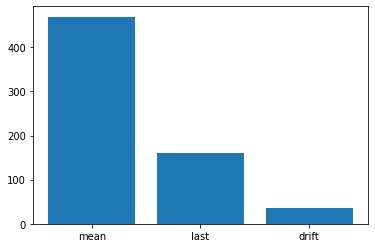

In [16]:
plt.bar(['mean', 'last', 'drift'], [mse_mean, mse_last, mse_drift])

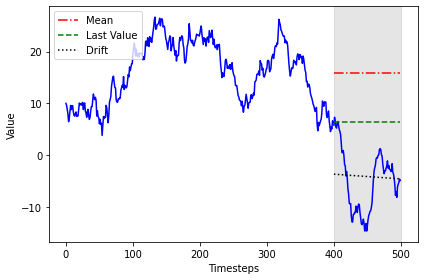

In [17]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label="Mean")
ax.plot(test['pred_last'], 'g--', label="Last Value")
ax.plot(test['pred_drift'], 'k:', label="Drift")

ax.axvspan(400, 500, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [18]:
# 4. Forecasting the next timestep
df_shift = df.shift(periods = 1)

df_shift.head()

,value
0,NaN
1,10.000000
2,9.586408
3,8.820382
4,7.896255


In [19]:
mse_one_step = mean_squared_error(test['value'], df_shift[400:])
print(mse_one_step)

1.0602313751584824


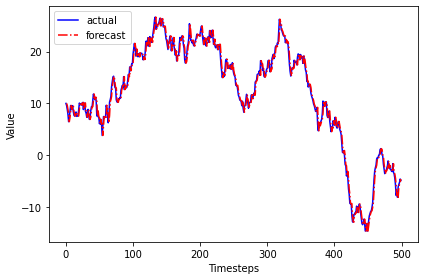

In [20]:
fig, ax = plt.subplots()


ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label="forecast")

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [21]:
# Record end time

end = dt.now()
elapsed = end - start

print("The program took: %02d:%02d:%02d:%02d" % (elapsed.days, elapsed.seconds // 3600, elapsed.seconds // 60 % 60, elapsed.seconds % 60))

The program took: 00:00:00:11
